# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [1]:
# Importando a biblioteca para criação de gráficos e visualizações
import matplotlib.pyplot as plt

# Importando a biblioteca para manipulação de vetores e matrizes numéricas
import numpy as np

# Importando a biblioteca para manipulação de dados em formato de tabela (dataframes)
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
ideb = pd.read_csv('ideb.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
ideb = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
ideb.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.8,165.60,2.3
1,2005,AC,49.3,151.8,149.60,1.8
2,2005,AC,48.8,163.6,155.80,1.9
3,2005,AC,48.8,159.0,153.39,1.9
4,2005,AC,74.7,138.0,134.19,2.3


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [5]:
# Filtrar os dados referentes ao ano de 2019
dados_2019 = ideb[ideb['ano'] == 2019]

# Agrupar os dados por estado e calcular a média
dados_agrupados = dados_2019.groupby('sigla_uf').mean()

# Exibir o resultado
dados_agrupados.head()


,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
sigla_uf,,,,,
AC,2019.0,88.561184,245.253478,237.995942,4.671739
AL,2019.0,92.081591,237.883189,231.412708,4.509295
AM,2019.0,86.853550,223.121965,219.773218,4.032397
AP,2019.0,81.552252,217.216667,215.831111,3.694444
BA,2019.0,83.032948,233.942537,230.205596,4.034125


### Atividade 3: Padronize os dados.

In [6]:
from sklearn.preprocessing import StandardScaler

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Selecionar os dados a serem padronizados
dados_selecionados = dados_agrupados[['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]

# Padronizar os dados
dados_padronizados = scaler.fit_transform(dados_selecionados)

# Criar um novo DataFrame com os dados padronizados
df_padronizado = pd.DataFrame(dados_padronizados, columns=dados_selecionados.columns)

# Exibir o resultado
df_padronizado.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,-0.025280,0.080727,-0.016434,0.092154
1,0.801179,-0.437122,-0.531887,-0.201424
2,-0.426168,-1.474271,-1.443233,-1.063297
3,-1.670713,-1.889188,-1.751891,-1.674063
4,-1.323101,-0.713999,-0.626401,-1.060175


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

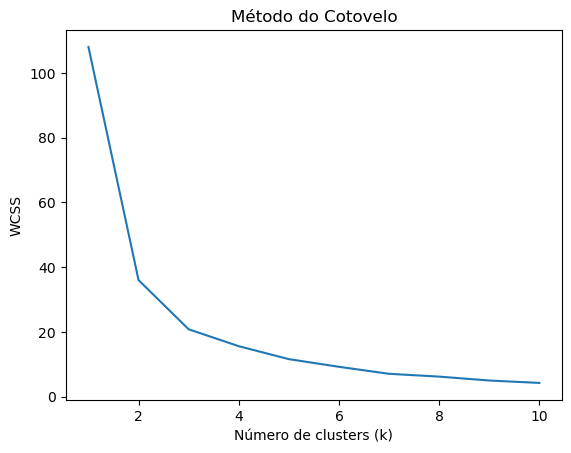

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para armazenar os valores de WCSS (Within-Cluster Sum of Squares)
wcss = []

# Testar diferentes valores de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_padronizado)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.show()

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

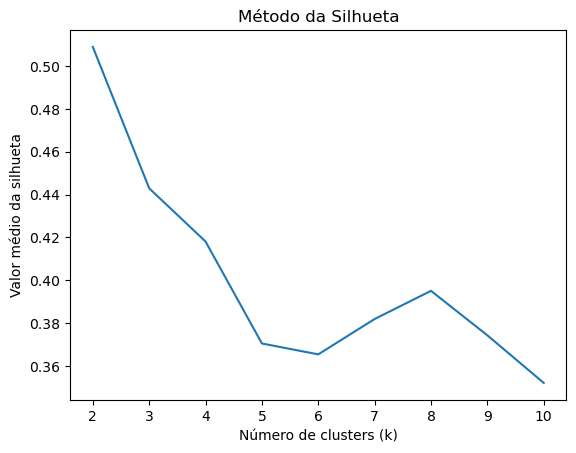

In [8]:
from sklearn.metrics import silhouette_score

# Lista para armazenar os valores de silhouette
silhouette_vals = []
k_values = range(2, 11)

# Testar diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_padronizado)
    silhouette_avg = silhouette_score(df_padronizado, cluster_labels)
    silhouette_vals.append(silhouette_avg)

# Plotar o gráfico do método da silhueta
plt.plot(k_values, silhouette_vals)
plt.title('Método da Silhueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Valor médio da silhueta')
plt.show()

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [9]:
# Definir o valor de k escolhido
k = 4

# Realizar a clusterização com o valor de k escolhido
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df_padronizado)

# Adicionar as labels de cluster ao DataFrame original
dados_selecionados['cluster'] = labels

# Exibir o resultado
dados_selecionados.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,cluster
sigla_uf,,,,,
AC,88.561184,245.253478,237.995942,4.671739,3
AL,92.081591,237.883189,231.412708,4.509295,3
AM,86.853550,223.121965,219.773218,4.032397,0
AP,81.552252,217.216667,215.831111,3.694444,0
BA,83.032948,233.942537,230.205596,4.034125,0


### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

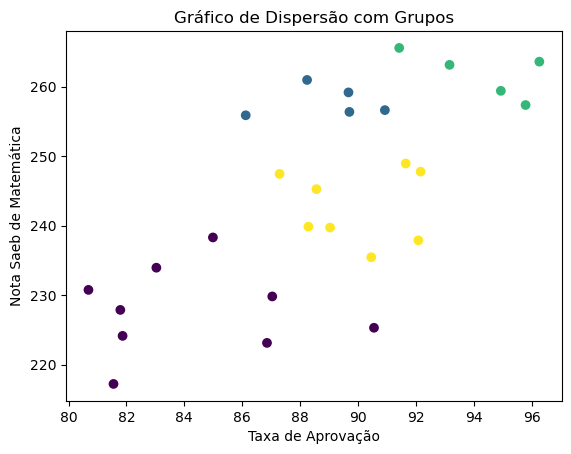

In [10]:
# Criar o gráfico de dispersão destacando cada grupo
plt.scatter(dados_selecionados['taxa_aprovacao'], dados_selecionados['nota_saeb_matematica'], c=dados_selecionados['cluster'])
plt.xlabel('Taxa de Aprovação')
plt.ylabel('Nota Saeb de Matemática')
plt.title('Gráfico de Dispersão com Grupos')
plt.show()

### Atividade 8: Quais são os estados de cada grupo?

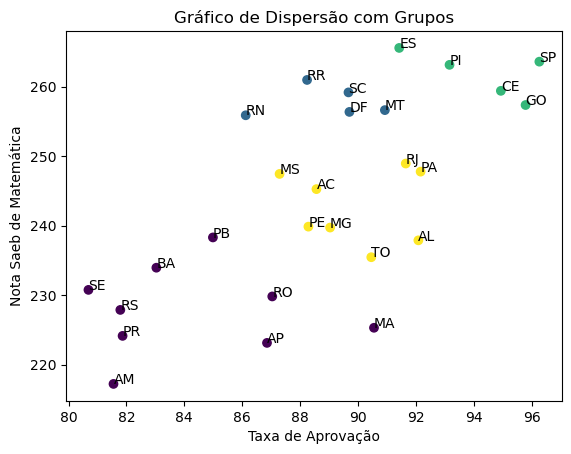

In [11]:
# Criar o gráfico de dispersão destacando cada grupo
plt.scatter(dados_selecionados['taxa_aprovacao'], dados_selecionados['nota_saeb_matematica'], c=dados_selecionados['cluster'])
plt.xlabel('Taxa de Aprovação')
plt.ylabel('Nota Saeb de Matemática')
plt.title('Gráfico de Dispersão com Grupos')

estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# Adicionar os nomes dos estados nos pontos do gráfico
for i, estado in enumerate(estados):
    plt.annotate(estado, (dados_selecionados['taxa_aprovacao'][i], dados_selecionados['nota_saeb_matematica'][i]))

plt.show()

### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

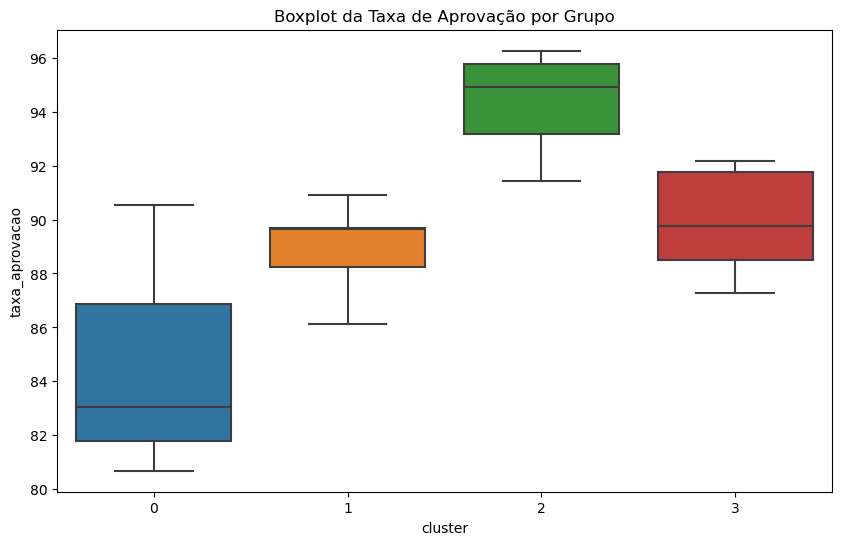

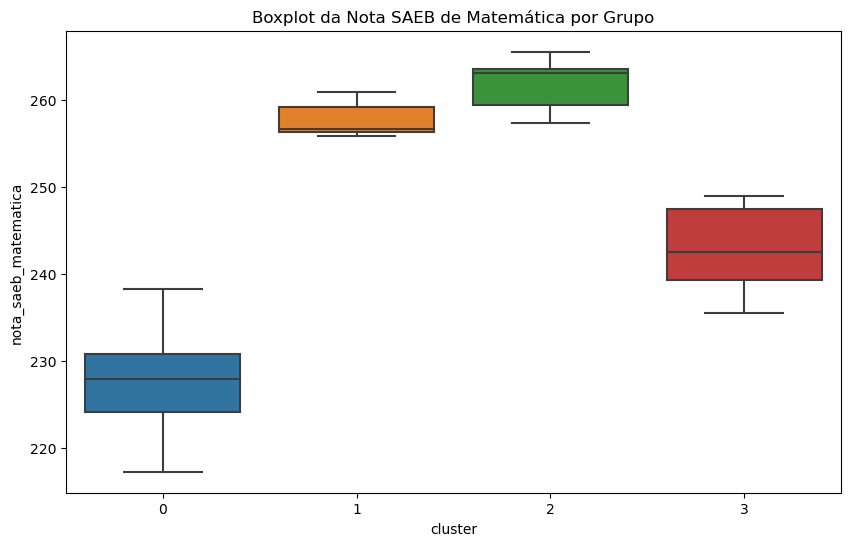

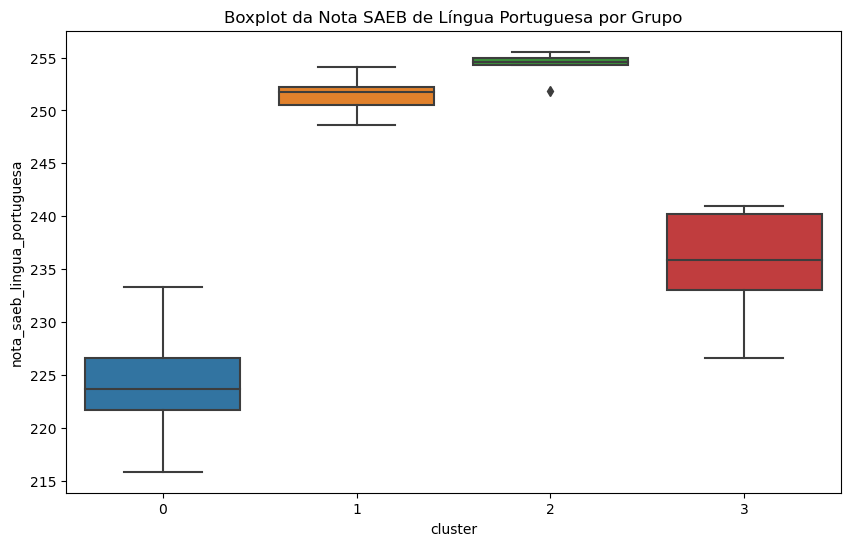

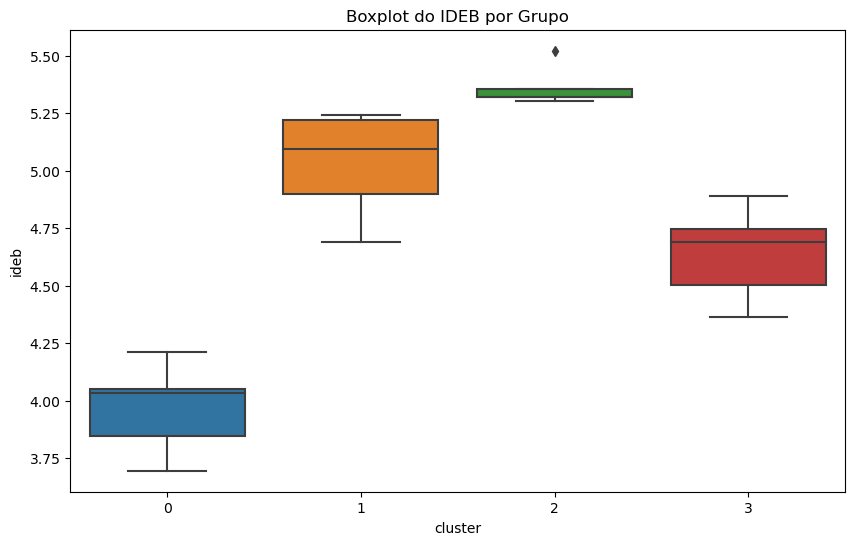

In [12]:
import seaborn as sns

# Criar o boxplot por grupo usando o Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_selecionados, x='cluster', y='taxa_aprovacao')
plt.title('Boxplot da Taxa de Aprovação por Grupo')

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_selecionados, x='cluster', y='nota_saeb_matematica')
plt.title('Boxplot da Nota SAEB de Matemática por Grupo')

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_selecionados, x='cluster', y='nota_saeb_lingua_portuguesa')
plt.title('Boxplot da Nota SAEB de Língua Portuguesa por Grupo')

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_selecionados, x='cluster', y='ideb')
plt.title('Boxplot do IDEB por Grupo')

plt.show()

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [13]:
from scipy.stats import f_oneway

# Realizar a ANOVA entre os grupos
anova_results = {}
for coluna in ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']:
    grupos = []
    for grupo in range(k):
        grupos.append(dados_selecionados[dados_selecionados['cluster'] == grupo][coluna])
    f_value, p_value = f_oneway(*grupos)
    anova_results[coluna] = {'F-value': f_value, 'p-value': p_value}

# Exibir os resultados da ANOVA
for coluna, resultados in anova_results.items():
    print(f'{coluna}:')
    print(f'  F-value: {resultados["F-value"]}')
    print(f'  p-value: {resultados["p-value"]}')
    if resultados["p-value"] < 0.05:
        print("  Os grupos são estatisticamente distintos.")
    else:
        print("  Não há evidência estatística de diferença significativa entre os grupos.")
    print()

taxa_aprovacao:
  F-value: 18.657633579530927
  p-value: 2.3316741103041923e-06
  Os grupos são estatisticamente distintos.

nota_saeb_matematica:
  F-value: 66.62845686480554
  p-value: 1.7054385010727915e-11
  Os grupos são estatisticamente distintos.

nota_saeb_lingua_portuguesa:
  F-value: 70.08413123405559
  p-value: 1.0134076242124102e-11
  Os grupos são estatisticamente distintos.

ideb:
  F-value: 84.55936557297234
  p-value: 1.433670943879008e-12
  Os grupos são estatisticamente distintos.



In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar o teste de Tukey HSD
tukey_results = {}
for coluna in ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']:
    tukey_result = pairwise_tukeyhsd(dados_selecionados[coluna], dados_selecionados['cluster'])
    tukey_results[coluna] = tukey_result

# Exibir os resultados do teste de Tukey HSD
for coluna, resultados in tukey_results.items():
    print(f'{coluna}:')
    print(resultados)
    print()

taxa_aprovacao:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   4.6687 0.0134  0.8241  8.5132   True
     0      2  10.0492  0.001  6.2047 13.8938   True
     0      3   5.6774  0.001  2.3281  9.0266   True
     1      2   5.3806 0.0118  1.0213  9.7399   True
     1      3   1.0087 0.8889 -2.9207  4.9381  False
     2      3  -4.3719 0.0254 -8.3013 -0.4425   True
----------------------------------------------------

nota_saeb_matematica:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1  29.9762  0.001  22.3299  37.6225   True
     0      2   33.987  0.001  26.3407  41.6333   True
     0      3  14.9626  0.001   8.3014  21.6238   True
     1      2   4.0107 0.5767  -4.6594  12.6808  False
     1      3 -15.0136  0.001 -22.8287  -7.198

### Atividade 11: Faça a clusterização com outro valor para k.

In [15]:
# Definir o valor de k escolhido
k = 6

# Realizar a clusterização com o valor de k escolhido
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(dados_padronizados)

# Adicionar as labels de cluster ao DataFrame original
dados_selecionados['cluster'] = labels

# Exibir o resultado
print(dados_selecionados)

          taxa_aprovacao  nota_saeb_matematica  nota_saeb_lingua_portuguesa  \
sigla_uf                                                                      
AC             88.561184            245.253478                   237.995942   
AL             92.081591            237.883189                   231.412708   
AM             86.853550            223.121965                   219.773218   
AP             81.552252            217.216667                   215.831111   
BA             83.032948            233.942537                   230.205596   
CE             94.930585            259.397187                   254.290339   
DF             89.700000            256.365000                   252.218333   
ES             91.419721            265.574820                   255.552122   
GO             95.783982            257.356514                   251.849397   
MA             90.548944            225.296995                   223.669534   
MG             90.924843            256.624005      

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: 

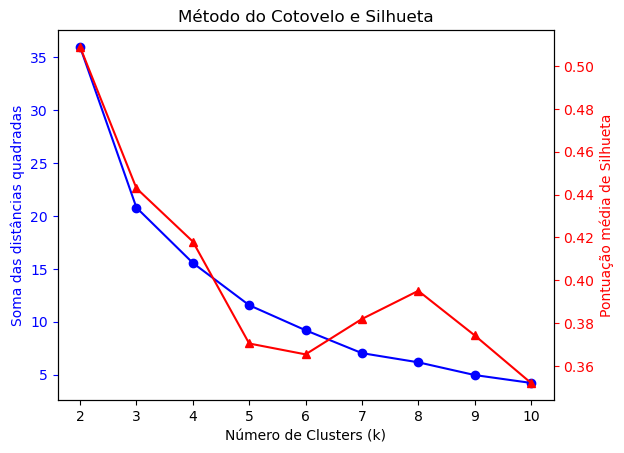

In [16]:
# Inicializar uma lista para armazenar os valores de soma das distâncias quadradas
ssd_values = []

# Inicializar uma lista para armazenar as pontuações de silhueta médias
silhouette_scores = []

# Definir uma faixa de valores de k a serem testados
k_values = range(2, 11)

# Realizar a clusterização para cada valor de k e calcular a soma das distâncias quadradas e as pontuações de silhueta
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(dados_padronizados)
    ssd_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(dados_padronizados, labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o gráfico do método do cotovelo e da silhueta em um único gráfico
fig, ax1 = plt.subplots()

# Gráfico do método do cotovelo
ax1.plot(k_values, ssd_values, 'bo-')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Soma das distâncias quadradas', color='b')
ax1.tick_params('y', colors='b')

# Gráfico da silhueta
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, 'r^-')
ax2.set_ylabel('Pontuação média de Silhueta', color='r')
ax2.tick_params('y', colors='r')

# Título e rótulos
plt.title('Método do Cotovelo e Silhueta')
plt.xlabel('Número de Clusters (k)')

plt.show()

### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

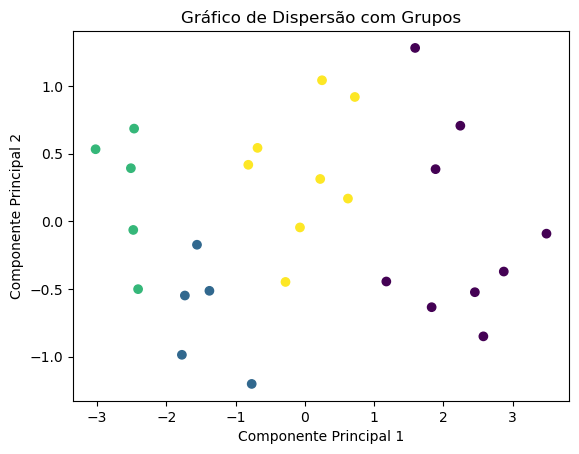

In [17]:
from sklearn.decomposition import PCA

# Redução de dimensionalidade usando PCA
pca = PCA(n_components=2)
dados_reduzidos = pca.fit_transform(dados_padronizados)

# Definir o valor de k escolhido para a clusterização
k = 4

# Realizar a clusterização com o valor de k escolhido
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(dados_padronizados)

# Adicionar as labels de cluster ao DataFrame original
dados_selecionados['cluster'] = labels

# Visualizar os grupos em um gráfico de dispersão com as duas principais componentes do PCA
plt.scatter(dados_reduzidos[:, 0], dados_reduzidos[:, 1], c=labels)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Dispersão com Grupos')

plt.show()